<a href="https://colab.research.google.com/github/Jude-Morgan/Machine-Learning-projects/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


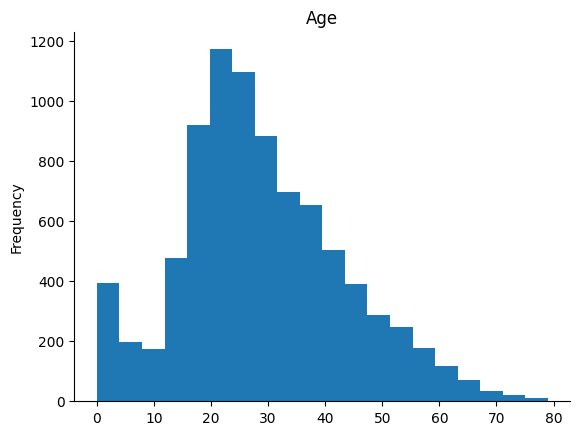

In [ ]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

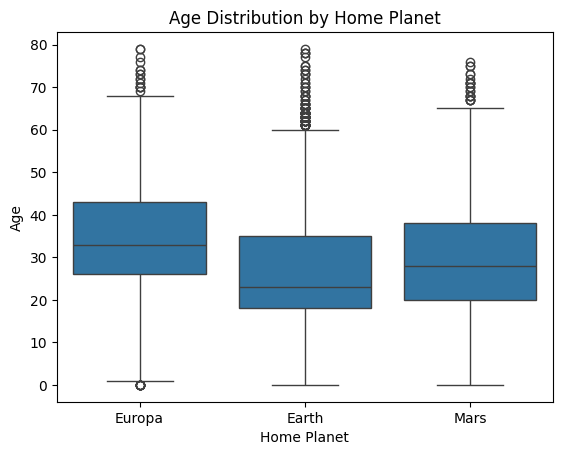

In [ ]:
# Age Distribution by Home Planet

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='HomePlanet', y='Age', data=df)
plt.title('Age Distribution by Home Planet')
plt.xlabel('Home Planet')
_ = plt.ylabel('Age')

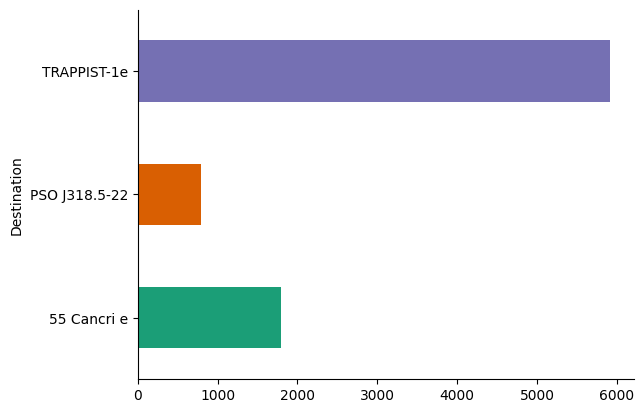

In [ ]:
df.groupby('Destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

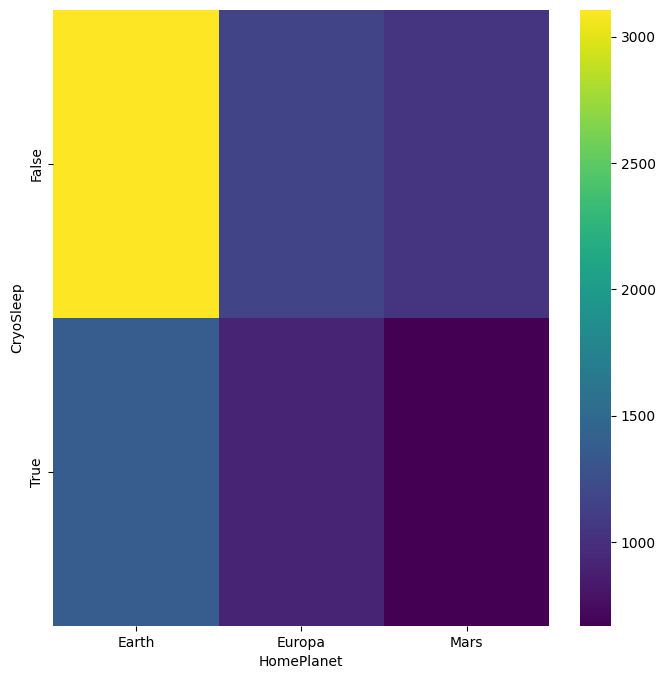

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CryoSleep'].value_counts()
    for x_label, grp in df.groupby('HomePlanet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('HomePlanet')
_ = plt.ylabel('CryoSleep')

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values and their counts
print(missing_values[missing_values > 0])

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df[['Age', 'RoomService', 'FoodCourt']] = imputer.fit_transform(df[['Age', 'RoomService', 'FoodCourt']])

In [ ]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)

<ipython-input-57-40b519e5eed4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)


In [ ]:
df['HomePlanet'].fillna('Missing', inplace=True)

In [ ]:
# Convert categorical data into numerical format using ine hot encoding
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']  # Replace with actual column names
encoded_data = pd.get_dummies(df, columns=categorical_columns, drop_first=True, prefix=categorical_columns, prefix_sep='_')

In [ ]:
# Merge encoded data with original dataframe
df = pd.concat([df, encoded_data], axis=1)

In [ ]:
# Drop original categorical columns
df = df.drop(columns=categorical_columns)

In [ ]:
X = df.drop('Transported', axis=1).select_dtypes(include=np.number)  # Select only numerical features
y = df['Transported']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [ ]:
# Create a RandomForestClassifier object with desired hyperparameters
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the testing data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7722829212190915
